In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
import pyranges as pr
%matplotlib inline
from scipy.stats import spearmanr,pearsonr
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from utils import *

#### ensure that df is ready for modelling 

In [23]:
enhancers_df = pd.read_csv("/mnt/lab_data2/kmualim/enh-gene-linking/datasets/embeddings/new_version/weightedPromoterEnhancerLinks/reweighted_abc/EnhancerPromoterSignalValue-625TFs.tsv.gz", compression="gzip", sep="\t")

relevant_regions_enhancers = enhancers_df.iloc[:, 6:]
relevant_regions_enhancers.tail()

numpy_relevant_regions_enhancers = relevant_regions_enhancers.to_numpy()
np.savez("EnhancersPromoters.TFSignalValue.npz", numpy_relevant_regions_enhancers)

with open("EnhancersPromoters.TFSignalValue.columns.txt", "w") as f:
    for i in relevant_regions_enhancers.columns:
        f.write(i)
        f.write("\t")
    f.close()
    
enhancers_df[['Chromosome', 'Start', 'End', 'TargetGene', 'ABC.Score']].to_csv("EnhancersPromoters.TFSignalValue.regions.tsv", sep="\t")

enhancer_promoter_scores = np.array(enhancers_df.loc[:, 'ABC.Score'])
apply_enhancer_promoter_scores = [i*j for i,j in zip(enhancer_promoter_scores, numpy_relevant_regions_enhancers)]

In [32]:
enhancers_df = pd.read_csv("/mnt/lab_data2/kmualim/enh-gene-linking/datasets/embeddings/new_version/weightedPromoterEnhancerLinks/reweighted_abc/EnhancerPromoterSignalValue-625TFs.tsv.gz", compression="gzip", sep="\t")
numpy_relevant_regions_enhancers = np.load("EnhancersPromoters.TFSignalValue.npz")['arr_0']
enhancer_promoter_scores = np.array(enhancers_df.loc[:, 'ABC.Score'])
apply_enhancer_promoter_scores = [i*j for i,j in zip(enhancer_promoter_scores, numpy_relevant_regions_enhancers)]

In [33]:
reweighted_regions = pd.read_csv("EnhancersPromoters.TFSignalValue.regions.tsv", sep="\t")

## generating gene-centric enhancer-promoter scores 
def get_genecentric_matrix(reweighted_regions, numpy_relevant_regions_enhancers):
    gene_clusters = {}
    unique_genes = np.array(reweighted_regions.loc[:, 'TargetGene'].drop_duplicates())
    for i in unique_genes: 
        print(i)
        matches = reweighted_regions.loc[reweighted_regions['TargetGene'] == i]
        index = matches.index.astype('int')
        gene_clusters[i] = np.sum([numpy_relevant_regions_enhancers[j] for j in index], axis=0) 
    return gene_clusters

#unweighted_gene_clusters = get_genecentric_matrix(reweighted_regions, numpy_relevant_regions_enhancers)
#pickle.dump(unweighted_gene_clusters, open("EnhancersPromoters.TFSignalValue.GeneClusters.p", "wb"))

weighted_gene_clusters = get_genecentric_matrix(reweighted_regions, apply_enhancer_promoter_scores)
pickle.dump(weighted_gene_clusters, open("EnhancersPromoters.TFSignalValue.GeneClusters.ABC.Score.weighted.p", "wb"))

DDX11L1
WASH7P
FAM138A
FAM138F
OR4F5
FAM87B
LINC00115
FAM41C
SAMD11
NOC2L
KLHL17
PLEKHN1
HES4
ISG15
AGRN
RNF223
C1orf159
TTLL10
TNFRSF18
TNFRSF4
SDF4
B3GALT6
UBE2J2
SCNN1D
ACAP3
PUSL1
TAS1R3
DVL1
MXRA8
AURKAIP1
CCNL2
MRPL20
ANKRD65
TMEM88B
VWA1
ATAD3C
ATAD3B
ATAD3A
TMEM240
SSU72
MIB2
MMP23B
CDK11B
SLC35E2B
CDK11A
SLC35E2
NADK
GNB1
CALML6
TMEM52
GABRD
PRKCZ
SKI
MORN1
RER1
PEX10
PLCH2
PANK4
HES5
TNFRSF14
FAM213B
MMEL1
TTC34
ACTRT2
LINC00982
PRDM16
ARHGEF16
MEGF6
TPRG1L
WRAP73
TP73
TP73-AS1
CCDC27
SMIM1
LRRC47
CEP104
DFFB
C1orf174
AJAP1
NPHP4
KCNAB2
CHD5
RPL22
RNF207
ICMT
LINC00337
HES3
GPR153
ACOT7
HES2
ESPN
TNFRSF25
PLEKHG5
NOL9
TAS1R1
ZBTB48
KLHL21
PHF13
THAP3
DNAJC11
CAMTA1
VAMP3
PER3
UTS2
TNFRSF9
PARK7
ERRFI1
SLC45A1
RERE
ENO1
ENO1-AS1
CA6
SLC2A7
SLC2A5
GPR157
H6PD
SPSB1
SLC25A33
TMEM201
PIK3CD
CLSTN1
CTNNBIP1
LZIC
NMNAT1
RBP7
UBE4B
KIF1B
PGD
APITD1-CORT
CORT
DFFA
PEX14
CASZ1
C1orf127
TARDBP
MASP2
SRM
EXOSC10
MTOR
MTOR-AS1
ANGPTL7
UBIAD1
FBXO2
FBXO44
FBXO6
MAD2L2
DRAXIN
AGTRAP
C1orf1

SPRR2B
SPRR2E
SPRR2F
SPRR2C
SPRR2G
LELP1
PRR9
LOR
PGLYRP3
PGLYRP4
S100A9
S100A12
S100A8
S100A7A
S100A7L2
S100A7
S100A6
S100A5
S100A4
S100A3
S100A2
S100A16
S100A14
S100A13
S100A1
CHTOP
SNAPIN
ILF2
NPR1
INTS3
SLC27A3
GATAD2B
DENND4B
CRTC2
SLC39A1
CREB3L4
JTB
RAB13
RPS27
NUP210L
TPM3
C1orf189
C1orf43
UBAP2L
HAX1
AQP10
ATP8B2
IL6R
SHE
TDRD10
UBE2Q1
UBE2Q1-AS1
CHRNB2
ADAR
KCNN3
PMVK
PBXIP1
PYGO2
SHC1
CKS1B
FLAD1
LENEP
ZBTB7B
DCST2
DCST1
ADAM15
EFNA4
EFNA3
EFNA1
SLC50A1
DPM3
KRTCAP2
TRIM46
MUC1
THBS3
MTX1
GBAP1
GBA
FAM189B
SCAMP3
CLK2
HCN3
PKLR
FDPS
RUSC1-AS1
RUSC1
ASH1L
POU5F1P4
ASH1L-AS1
MSTO1
YY1AP1
DAP3
GON4L
SYT11
RIT1
KIAA0907
RXFP4
ARHGEF2
SSR2
UBQLN4
LAMTOR2
RAB25
MEX3A
LMNA
SEMA4A
SLC25A44
PMF1-BGLAP
PMF1
BGLAP
PAQR6
SMG5
TMEM79
VHLL
CCT3
TSACC
RHBG
C1orf61
MEF2D
IQGAP3
TTC24
GPATCH4
HAPLN2
BCAN
NES
CRABP2
ISG20L2
RRNAD1
MRPL24
HDGF
PRCC
SH2D2A
INSRR
NTRK1
PEAR1
LRRC71
ARHGEF11
ETV3L
ETV3
CYCSP52
FCRL5
FCRL4
FCRL3
FCRL2
FCRL1
CD5L
KIRREL
KIRREL-IT1
CD1D
CD1A
CD1C
CD1B
CD1E
OR10T2
OR

LINC01363
LOC100505918
LOC101928565
LOC101928596
LINC01142
LOC101928650
LOC100506023
LOC101928673
LOC730159
LOC102724601
LOC101928696
LINC01657
LINC01645
LINC01741
LOC730102
FLJ23867
LHX4-AS1
OVAAL
LOC100132062
LOC100132287
LOC100133331
KIAA1614-AS1
LINC01732
LINC01699
LINC01344
LINC01686
LINC01350
LOC102724919
PACERR
LINC01351
LINC01720
LINC01222
LINC01221
LOC101929224
MGAT4EP
LOC148709
LOC100506747
TMEM183B
LINC01353
LINC01136
LINC00260
LOC101929441
LINC00628
BLACAT1
LOC284578
MFSD4A
RAB29
LOC284581
SRGAP2D
FCMR
LOC148696
LINC01696
LOC101930114
LINC01693
LOC102723727
LOC101929541
LINC01740
SPATA45
LINC00538
LOC102723833
SPATA17-AS1
LINC01653
TGFB2-AS1
TGFB2-OT1
LYPLAL1-AS1
LOC102723886
LINC01352
HLX-AS1
C1orf140
LINC01655
TAF1A-AS1
CCDC185
GTF2IP20
LOC100287497
LOC101927143
LOC101927164
STUM
COQ8A
LOC101927478
LINC01736
LOC101927604
LOC149373
DISC2
LINC01744
PCNX2
MAP3K21
LOC101927765
LINC01354
LOC101927787
LINC01132
LOC101927851
ERO1B
LOC100130331
LINC01139
MIR1273E
BECN2
LINC01347


FEV
CRYBA2
IHH
NHEJ1
SLC23A3
CNPPD1
FAM134A
ZFAND2B
ABCB6
ATG9A
ANKZF1
GLB1L
STK16
TUBA4A
TUBA4B
DNAJB2
PTPRN
RESP18
DNPEP
DES
SPEG
GMPPA
ASIC4
CHPF
TMEM198
OBSL1
INHA
STK11IP
SLC4A3
EPHA4
PAX3
CCDC140
SGPP2
FARSB
MOGAT1
ACSL3
KCNE4
SCG2
AP1S3
WDFY1
MRPL44
SERPINE2
FAM124B
CUL3
DOCK10
NYAP2
IRS1
RHBDD1
COL4A4
COL4A3
MFF
TM4SF20
AGFG1
C2orf83
SLC19A3
CCL20
DAW1
SPHKAP
PID1
DNER
TRIP12
FBXO36
SLC16A14
SP110
SP140
SP140L
SP100
CAB39
ITM2C
GPR55
SPATA3
C2orf72
PSMD1
HTR2B
ARMC9
B3GNT7
NCL
LINC00471
NMUR1
PTMA
PDE6D
COPS7B
NPPC
DIS3L2
ALPP
ECEL1P2
ALPPL2
ALPI
ECEL1
PRSS56
CHRND
CHRNG
TIGD1
EIF4E2
EFHD1
GIGYF2
KCNJ13
C2orf82
NGEF
NEU2
INPP5D
ATG16L1
SAG
DGKD
USP40
UGT1A8
UGT1A10
UGT1A9
UGT1A7
UGT1A6
UGT1A5
UGT1A4
UGT1A3
DNAJB3
UGT1A1
MROH2A
HJURP
MSL3P1
TRPM8
SPP2
ARL4C
SH3BP4
AGAP1
AGAP1-IT1
GBX2
ASB18
IQCA1
ACKR3
COPS8
COL6A3
MLPH
PRLH
RAB17
LRRFIP1
RBM44
RAMP1
UBE2F
UBE2F-SCLY
SCLY
ESPNL
KLHL30
ILKAP
HES6
PER2
TRAF3IP1
ASB1
TWIST2
HDAC4
NDUFA10
OR6B2
OR6B3
OTOS
GPC1
ANKMY1
DUSP28
RNPEPL1


PRICKLE2
PRICKLE2-AS2
PRICKLE2-AS3
ADAMTS9
ADAMTS9-AS1
ADAMTS9-AS2
MAGI1
MAGI1-IT1
MAGI1-AS1
SLC25A26
LRIG1
KBTBD8
SUCLG2
FAM19A1
FAM19A4
EOGT
TMF1
UBA3
ARL6IP5
LMOD3
FRMD4B
MITF
FOXP1
FOXP1-AS1
EIF4E3
GPR27
PROK2
LINC00877
LINC00870
RYBP
SHQ1
GXYLT2
PPP4R2
EBLN2
PDZRN3
PDZRN3-AS1
CNTN3
FAM86DP
FRG2C
LINC00960
ZNF717
ROBO2
ROBO1
GBE1
LINC00971
CADM2
CADM2-AS2
VGLL3
CHMP2B
POU1F1
HTR1F
CGGBP1
ZNF654
C3orf38
EPHA3
PROS1
ARL13B
STX19
NSUN3
LINC00879
MTHFD2P1
EPHA6
ARL6
CRYBG3
GABRR3
OR5AC2
OR5H1
OR5H14
OR5H15
OR5H6
OR5H2
OR5K4
OR5K3
OR5K1
OR5K2
CLDND1
GPR15
CPOX
ST3GAL6-AS1
ST3GAL6
DCBLD2
MIR548G
COL8A1
FILIP1L
CMSS1
TBC1D23
NIT2
LNP1
TMEM45A
TFG
ABI3BP
IMPG2
SENP7
FAM172BP
TRMT10C
PCNP
ZBTB11
ZBTB11-AS1
RPL24
PDCL3P4
CEP97
NXPE3
NFKBIZ
ZPLD1
MIR548A3
ALCAM
CBLB
LINC00882
CCDC54
BBX
LINC00635
LINC00636
CD47
IFT57
HHLA2
MYH15
KIAA1524
DZIP3
RETNLB
TRAT1
GUCA1C
MORC1
MORC1-AS1
LINC00488
DPPA2
DPPA4
PVRL3-AS1
CD96
ZBED2
PLCXD2
PLCXD2-AS1
PHLDB2
ABHD10
TAGLN3
TMPRSS7
C3orf52
GCSAM
SLC9C1
CD20

NIPAL1
TXK
TEC
SLAIN2
SLC10A4
ZAR1
FRYL
OCIAD1
OCIAD2
CWH43
DCUN1D4
LRRC66
SGCB
SPATA18
USP46
USP46-AS1
DANCR
ERVMER34-1
RASL11B
SCFD2
FIP1L1
LNX1
LNX1-AS1
LNX1-AS2
RPL21P44
CHIC2
GSX2
PDGFRA
KIT
KDR
SRD5A3
SRD5A3-AS1
TMEM165
CLOCK
PDCL2
NMU
EXOC1
CEP135
KIAA1211
AASDH
PPAT
PAICS
SRP72
ARL9
THEGL
HOPX
SPINK2
REST
NOA1
POLR2B
IGFBP7
IGFBP7-AS1
TECRL
EPHA5
CENPC
STAP1
UBA6
UBA6-AS1
GNRHR
TMPRSS11D
TMPRSS11A
TMPRSS11GP
TMPRSS11F
FTLP10
TMPRSS11BNL
TMPRSS11B
YTHDC1
TMPRSS11E
UGT2B17
UGT2B15
UGT2A3
UGT2B10
UGT2B7
UGT2B11
UGT2B28
UGT2B4
UGT2A1
UGT2A2
SULT1B1
SULT1E1
CSN1S1
CSN2
STATH
HTN3
HTN1
CSN1S2AP
ODAM
FDCSP
CSN3
CABS1
SMR3A
SMR3B
MUC7
AMTN
AMBN
ENAM
UTP3
RUFY3
GRSF1
MOB1B
DCK
SLC4A4
GC
NPFFR2
ADAMTS3
COX18
ANKRD17
ALB
AFP
AFM
RASSF6
CXCL6
PF4V1
CXCL1
PF4
PPBP
CXCL5
CXCL3
PPBPP2
CXCL2
MTHFD2L
EPGN
EREG
AREG
BTC
PARM1
RCHY1
THAP6
C4orf26
CDKL2
G3BP2
USO1
PPEF2
NAAA
SDAD1
CXCL9
CXCL10
CXCL11
ART3
NUP54
SCARB2
FAM47E
FAM47E-STBD1
CCDC158
SHROOM3
SOWAHB
SEPT11
CCNI
CCNG2
CXCL13
CNOT6L
MRPL1

APC
SRP19
REEP5
DCP2
MCC
TSSK1B
YTHDC2
KCNN2
TRIM36
PGGT1B
CCDC112
FEM1C
TMED7-TICAM2
TICAM2
TMED7
CDO1
ATG12
AP3S1
ARL14EPL
COMMD10
SEMA6A
LINC00992
DTWD2
DMXL1
TNFAIP8
HSD17B4
FAM170A
PRR16
FTMT
SRFBP1
LOX
ZNF474
SNCAIP
SNX2
SNX24
PPIC
PRDM6
CEP120
CSNK1G3
ZNF608
GRAMD3
ALDH7A1
PHAX
LMNB1
MARCH3
C5orf63
MEGF10
PRRC1
CTXN3
SLC12A2
FBN2
SLC27A6
ISOC1
ADAMTS19-AS1
ADAMTS19
KIAA1024L
CHSY3
HINT1
LYRM7
CDC42SE2
RAPGEF6
FNIP1
ACSL6
IL3
CSF2
P4HA2-AS1
P4HA2
PDLIM4
SLC22A4
SLC22A5
C5orf56
IRF1
IL5
RAD50
IL13
IL4
KIF3A
CCNI2
SEPT8
SOWAHA
SHROOM1
GDF9
UQCRQ
LEAP2
AFF4
ZCCHC10
HSPA4
FSTL4
C5orf15
VDAC1
TCF7
SKP1
PPP2CA
CDKL3
UBE2B
CDKN2AIPNL
SAR1B
SEC24A
CAMLG
DDX46
C5orf24
TXNDC15
PCBD2
CATSPER3
PITX1
H2AFY
TIFAB
NEUROG1
CXCL14
SLC25A48
IL9
FBXL21
LECT2
TGFBI
SMAD5-AS1
SMAD5
TRPC7
TRPC7-AS2
SPOCK1
KLHL3
HNRNPA0
NPY6R
MYOT
PKD2L2
FAM13B
WNT8A
NME5
BRD8
KIF20A
CDC23
GFRA3
CDC25C
FAM53C
KDM3B
REEP2
EGR1
ETF1
HSPA9
LRRTM2
CTNNA1
SIL1
MATR3
PAIP2
SLC23A1
MZB1
PROB1
SPATA24
DNAJC18
ECSCR
TMEM173
UBE

IER3
HCG20
LINC00243
DDR1
GTF2H4
VARS2
SFTA2
DPCR1
HCG21
MUC21
MUC22
HCG22
C6orf15
PSORS1C1
CDSN
PSORS1C2
CCHCR1
TCF19
POU5F1
PSORS1C3
HCG27
HLA-C
HLA-B
MICA
HCP5
MICB
MCCD1
DDX39B
ATP6V1G2-DDX39B
DDX39B-AS1
ATP6V1G2
NFKBIL1
LTA
TNF
LTB
LST1
NCR3
AIF1
PRRC2A
BAG6
APOM
C6orf47
GPANK1
CSNK2B
LY6G5B
LY6G5C
ABHD16A
LY6G6F
LY6G6E
LY6G6D
LY6G6C
DDAH2
CLIC1
MSH5-SAPCD1
MSH5
SAPCD1
SAPCD1-AS1
VWA7
VARS
LSM2
HSPA1L
HSPA1A
HSPA1B
C6orf48
NEU1
SLC44A4
EHMT2
ZBTB12
C2
CFB
NELFE
SKIV2L
DXO
STK19
C4B
C4A
CYP21A1P
TNXA
TNXB
ATF6B
FKBPL
PRRT1
PPT2-EGFL8
PPT2
EGFL8
AGPAT1
RNF5
AGER
PBX2
GPSM3
NOTCH4
C6orf10
HCG23
BTNL2
HLA-DRA
HLA-DRB5
HLA-DRB6
HLA-DRB1
HLA-DQA1
HLA-DQB1
HLA-DQB1-AS1
HLA-DQA2
HLA-DQB2
HLA-DOB
TAP2
PSMB8
TAP1
PSMB9
HLA-DMB
HLA-DMA
BRD2
HLA-DOA
HLA-DPA1
HLA-DPB1
HLA-DPB2
HCG24
COL11A2
RXRB
SLC39A7
HSD17B8
RING1
HCG25
VPS52
RPS18
B3GALT4
WDR46
PFDN6
RGL2
TAPBP
ZBTB22
DAXX
KIFC1
PHF1
CUTA
SYNGAP1
ZBTB9
BAK1
GGNBP1
LINC00336
ITPR3
UQCC2
IP6K3
LEMD2
MLN
LINC01016
GRM4
HMGA1
C6orf1
RPS10-NUDT

FAM220A
RAC1
DAGLB
KDELR2
GRID2IP
ZDHHC4
C7orf26
ZNF853
ZNF316
ZNF12
PMS2CL
CCZ1B
C1GALT1
COL28A1
MIOS
RPA3
GLCCI1
ICA1
NXPH1
NDUFA4
PHF14
THSD7A
TMEM106B
VWDE
SCIN
ARL4A
ETV1
DGKB
AGMO
MEOX2
ISPD
ISPD-AS1
SOSTDC1
LRRC72
ANKMY2
BZW2
TSPAN13
AGR2
AGR3
AHR
SNX13
PRPS1L1
HDAC9
TWIST1
FERD3L
TWISTNB
TMEM196
MACC1
MACC1-AS1
ITGB8
ABCB5
SP8
RPL23P8
SP4
DNAH11
CDCA7L
RAPGEF5
STEAP1B
IL6
TOMM7
FAM126A
KLHL7-AS1
KLHL7
NUPL2
GPNMB
MALSU1
IGF2BP3
RPS2P32
TRA2A
CCDC126
FAM221A
STK31
NPY
MPP6
DFNA5
OSBPL3
CYCS
C7orf31
NPVF
NFE2L3
HNRNPA2B1
CBX3
SNX10
KIAA0087
C7orf71
SKAP2
HOXA1
HOTAIRM1
HOXA2
HOXA3
HOXA-AS2
HOXA4
HOXA5
HOXA6
HOXA-AS3
HOXA7
HOXA9
HOXA10
HOXA11
HOXA11-AS
HOXA13
HOTTIP
EVX1-AS
EVX1
HIBADH
TAX1BP1
JAZF1
JAZF1-AS1
CREB5
TRIL
CPVL
CHN2
PRR15
ZNRF2P2
WIPF3
SCRN1
FKBP14
PLEKHA8
ZNRF2
NOD1
GGCT
GARS
CRHR2
INMT
AQP1
GHRHR
ADCYAP1R1
NEUROD6
CCDC129
PPP1R17
PDE1C
LSM5
AVL9
DPY19L1P1
ZNRF2P1
DPY19L1P2
KBTBD2
RP9P
FKBP9
NT5C3A
RP9
BBS9
BMPER
NPSR1-AS1
NPSR1
DPY19L1
DPY19L2P1
TBX20
HERPUD2
SEPT7

TCAF2P1
LOC154761
TCAF1
LOC101928605
LOC101928700
LOC105375556
GHET1
LOC155060
ZNF767P
LOC728743
GIMAP1-GIMAP5
IQCA1L
LINC01287
LOC101929998
LOC100506302
LOC389602
LOC285889
LINC00244
LOC101927914
LOC100506585
OR4F21
RPL23AP53
ZNF596
FAM87A
FBXO25
TDRP
ERICH1
ERICH1-AS1
DLGAP2
CLN8
ARHGEF10
KBTBD11-OT1
KBTBD11
MYOM2
MCPH1
ANGPT2
AGPAT5
XKR5
GS1-24F4.2
DEFB1
DEFA6
DEFA4
DEFA8P
DEFA9P
DEFA10P
DEFA1
DEFA1B
DEFT1P
DEFT1P2
DEFA3
DEFA11P
DEFA5
FAM66B
USP17L4
ZNF705G
DEFB4B
SPAG11B
DEFB106A
DEFB106B
DEFB105A
DEFB105B
FAM90A7P
FAM90A10P
DEFB104B
DEFB104A
SPAG11A
DEFB103A
DEFB103B
DEFB4A
ZNF705B
FAM66E
USP17L8
USP17L3
FAM86B3P
CLDN23
MFHAS1
ERI1
PPP1R3B
TNKS
LINC00599
MSRA
PRSS55
RP1L1
C8orf74
SOX7
PINX1
XKR6
MTMR9
SLC35G5
TDH
FAM167A
BLK
LINC00208
GATA4
C8orf49
NEIL2
FDFT1
CTSB
DEFB136
DEFB135
DEFB134
DEFB130
ZNF705D
FAM66D
USP17L7
USP17L2
FAM90A2P
FAM86B1
FAM66A
DEFB109P1
FAM90A25P
FAM86B2
LONRF1
LINC00681
KIAA1456
DLC1
C8orf48
SGCZ
TUSC3
MSR1
FGF20
MICU3
ZDHHC2
CNOT7
VPS37A
MTMR7
SLC7A2
PDGF

ZNF25
ZNF33A
ZNF37A
HSD17B7P2
SEPT7P9
LINC00999
ACTR3BP5
CCNYL2
LINC00839
ZNF37BP
ZNF33B
BMS1
RET
CSGALNACT2
RASGEF1A
FXYD4
HNRNPF
ZNF487
ZNF239
ZNF485
ZNF32-AS3
ZNF32
ZNF32-AS1
ZNF32-AS2
HNRNPA3P1
LINC00619
LINC00840
LINC00841
CXCL12
TMEM72-AS1
TMEM72
RASSF4
C10orf10
C10orf25
ZNF22
RSU1P2
ANKRD30BP3
OR13A1
ALOX5
MARCH8
ZFAND4
AGAP4
BMS1P5
FAM35BP
SYT15
GPRIN2
NPY4R
LINC00842
HNRNPA1P33
BMS1P6
FAM35DP
ANTXRLP1
ANTXRL
ANXA8L1
CTSLP2
AGAP9
ANXA8
ZNF488
RBP3
GDF2
GDF10
GLUD1P7
FRMPD2
MAPK8
ARHGAP22
WDFY4
LRRC18
VSTM4
FAM170B-AS1
FAM170B
C10orf128
C10orf71-AS1
C10orf71
DRGX
ERCC6
PGBD3
SLC18A3
CHAT
C10orf53
OGDHL
PARG
PARGP1
TIMM23B
MSMB
NCOA4
TIMM23
AGAP6
ASAH2
SGMS1
ASAH2B
A1CF
PRKG1
CSTF2T
PRKG1-AS1
DKK1
MBL2
PCDH15
MTRNR2L5
ZWINT
IPMK
CISD1
UBE2D1
TFAM
BICC1
FAM133CP
LINC00844
PHYHIPL
FAM13C
SLC16A9
CCDC6
ANK3
CDK1
RHOBTB1
LINC00845
TMEM26
C10orf107
ARID5B
RTKN2
ZNF365
ADO
EGR2
NRBF2
JMJD1C
JMJD1C-AS1
REEP3
ANXA2P3
CTNNA3
LRRTM3
DNAJC12
SIRT1
HERC4
POU5F1P5
MYPN
ATOH7
PBLD
HNRNPH3
RUFY

ZDHHC13
CSRP3
E2F8
NAV2-AS5
NAV2-AS4
NAV2
NAV2-AS2
DBX1
HTATIP2
PRMT3
SLC6A5
NELL1
ANO5
SLC17A6
FANCF
GAS2
SVIP
CCDC179
LUZP2
ANO3
MUC15
SLC5A12
FIBIN
BBOX1
CCDC34
LGR4
LIN7C
BDNF-AS
LINC00678
BDNF
KIF18A
METTL15
KCNA4
FSHB
ARL14EP
MPPED2
DCDC1
DNAJC24
IMMP1L
ELP4
PAX6
RCN1
WT1
WT1-AS
EIF3M
CCDC73
PRRG4
QSER1
DEPDC7
TCP11L1
CSTF3
CSTF3-AS1
HIPK3
KIAA1549L
C11orf91
CD59
FBXO3
LMO2
CAPRIN1
NAT10
ABTB2
CAT
ELF5
EHF
APIP
PDHX
CD44
SLC1A2
PAMR1
FJX1
TRIM44
LDLRAD3
COMMD9
PRR5L
TRAF6
RAG1
RAG2
C11orf74
LRRC4C
HNRNPKP3
API5
TTC17
HSD17B12
ALKBH3
SEC14L1P1
ALKBH3-AS1
C11orf96
ACCSL
ACCS
EXT2
ALX4
CD82
TSPAN18
TP53I11
PRDM11
SYT13
CHST1
SLC35C1
CRY2
MAPK8IP1
C11orf94
PEX16
PHF21A
CREB3L1
DGKZ
MDK
CHRM4
AMBRA1
HARBI1
ATG13
ARHGAP1
ZNF408
F2
CKAP5
LRP4-AS1
LRP4
C11orf49
ARFGAP2
PACSIN3
DDB2
ACP2
NR1H3
MADD
MYBPC3
SPI1
SLC39A13
PSMC3
RAPSN
CELF1
PTPMT1
KBTBD4
NDUFS3
FAM180B
C1QTNF4
MTCH2
AGBL2
FNBP4
NUP160
PTPRJ
OR4B1
OR4X2
OR4X1
OR4S1
OR4C3
OR4C5
OR4A47
TRIM49B
TRIM64C
FOLH1
OR4C13
OR4C12
OR4A5
O

LOC400002
CLEC12A
CLEC1B
CLEC12B
LOC102724020
CLEC9A
CLEC1A
CLEC7A
OLR1
TMEM52B
GABARAPL1
KLRD1
LOC101928100
KLRK1
KLRC4-KLRK1
KLRC4
KLRC3
KLRC2
KLRC1
KLRA1P
MAGOHB
STYK1
YBX3
LOC101928162
TAS2R7
TAS2R8
TAS2R9
TAS2R10
PRR4
PRH1-PRR4
PRH1
TAS2R13
PRH2
PRH1-TAS2R14
TAS2R14
TAS2R50
TAS2R20
TAS2R19
TAS2R31
TAS2R46
TAS2R43
TAS2R30
SMIM10L1
TAS2R42
PRB3
PRB4
PRB1
PRB2
LINC01252
ETV6
BCL2L14
LRP6
MANSC1
LOH12CR2
BORCS5
DUSP16
CREBL2
GPR19
CDKN1B
APOLD1
DDX47
RPL13AP20
GPRC5A
GPRC5D
HEBP1
LOC100506314
HTR7P1
FAM234B
GSG1
EMP1
LINC01559
GRIN2B
ATF7IP
PLBD1
PLBD1-AS1
GUCY2C
HIST4H4
H2AFJ
WBP11
C12orf60
SMCO3
ART4
MGP
ERP27
ARHGDIB
PDE6H
LINC01489
RERG
RERG-AS1
PTPRO
EPS8
STRAP
DERA
SLC15A5
MGST1
LMO3
SKP1P2
RERGL
PIK3C2G
PLCZ1
CAPZA3
PLEKHA5
AEBP2
LOC100506393
PDE3A
SLCO1C1
SLCO1B3
SLCO1B7
SLCO1B1
SLCO1A2
IAPP
PYROXD1
RECQL
GOLT1B
SPX
GYS2
LDHB
KCNJ8
ABCC9
CMAS
ST8SIA1
C2CD5
LOC105369691
ETNK1
LOC101928441
SOX5
LOC101928471
LINC00477
BCAT1
C12orf77
LOC645177
LRMP
CASC1
ETFRF1
KRAS
LMNTD1
RASSF8-

MIPEP
PCOTH
C1QTNF9B
ANKRD20A19P
SPATA13-AS1
SPATA13
C1QTNF9
LINC00566
PARP4
TPTE2P6
ATP12A
RNF17
CENPJ
TPTE2P1
PABPC3
AMER2
LINC00463
LINC01053
MTMR6
NUP58
ATP8A2
SHISA2
RNF6
CDK8
WASF3
GPR12
USP12
USP12-AS1
USP12-AS2
LINC00412
RPL21
RPL21P28
RASL11A
GTF3A
MTIF3
LNX2
POLR1D
GSX1
PLUT
PDX1
ATP5EP2
LINC00543
CDX2
URAD
FLT3
PAN3-AS1
PAN3
FLT1
POMP
SLC46A3
MTUS2
MTUS2-AS1
SLC7A1
LOC102723345
UBL3
LINC00297
LINC00572
LINC00544
LINC00365
LINC00384
KATNAL1
LINC00426
LINC01058
HMGB1
USPL1
ALOX5AP
LINC00398
LINC00545
MEDAG
TEX26-AS1
TEX26
HSPH1
B3GLCT
RXFP2
EEF1DP3
FRY-AS1
FRY
ZAR1L
BRCA2
N4BP2L1
N4BP2L2
MINOS1P1
N4BP2L2-IT2
PDS5B
LINC00423
KL
STARD13
STARD13-AS
RFC3
LINC00457
MAB21L1
NBEA
LINC00445
DCLK1
CCDC169-SOHLH2
SOHLH2
CCDC169
SPG20
SPG20-AS1
CCNA1
SERTM1
RFXAP
SMAD9
ALG5
EXOSC8
SUPT20H
CSNK1A1L
LINC01048
LINC00547
POSTN
TRPC4
LINC00571
UFM1
LINC00437
LINC00366
FREM2
STOML3
PROSER1
NHLRC3
LHFP
COG6
LINC00332
LINC00548
LINC00598
FOXO1
MRPS31
SLC25A15
TPTE2P5
SUGT1P3
ELF1
WBP4
KBTBD6
LOC

GALC
GPR65
LOC101928791
LINC01146
KCNK10
SPATA7
PTPN21
ZC3H14
EML5
TTC8
FOXN3
FOXN3-AS1
FOXN3-AS2
EFCAB11
TDP1
KCNK13
PSMC1
NRDE2
CALM1
LINC00642
LOC105370619
TTC7B
LOC101928909
LOC105370622
RPS6KA5
C14orf159
GPR68
CCDC88C
PPP4R3A
CATSPERB
TC2N
FBLN5
TRIP11
ATXN3
NDUFB1
CPSF2
SLC24A4
RIN3
LGMN
GOLGA5
LOC101929002
CHGA
ITPK1
ITPK1-AS1
MOAP1
TMEM251
GON7
UBR7
BTBD7
UNC79
COX8C
PRIMA1
FAM181A-AS1
FAM181A
ASB2
LINC00521
OTUB2
DDX24
IFI27L1
IFI27
IFI27L2
PPP4R4
SERPINA10
SERPINA6
SERPINA2
SERPINA1
SERPINA11
SERPINA9
SERPINA12
SERPINA4
SERPINA5
SERPINA3
SERPINA13P
GSC
DIGIT
DICER1
DICER1-AS1
CLMN
LOC101929080
SYNE3
SNHG10
GLRX5
TCL6
TCL1B
TCL1A
TUNAR
C14orf132
BDKRB2
BDKRB1
ATG2B
GSKIP
AK7
LOC730202
PAPOLA
VRK1
LINC00618
LOC101929241
LOC100129345
LINC01550
C14orf177
BCL11B
SETD3
CCNK
CCDC85C
HHIPL1
CYP46A1
EML1
EVL
DEGS2
YY1
SLC25A29
SLC25A47
WARS
WDR25
BEGAIN
LINC00523
DLK1
MEG3
RTL1
MEG8
SNHG24
MIR381HG
MEG9
LINC00524
LOC100507277
DIO3OS
DIO3
LINC00239
PPP2R5C
DYNC1H1
HSP90AA1
WDR20
MOK
ZN

ABCA3
ABCA17P
CCNF
C16orf59
LOC729652
NTN3
TBC1D24
ATP6V0C
AMDHD2
CEMP1
PDPK1
LOC652276
FLJ42627
ERVK13-1
KCTD5
PRSS27
SRRM2-AS1
SRRM2
ELOB
PRSS33
PRSS41
PRSS21
ZG16B
PRSS30P
PRSS22
FLYWCH2
FLYWCH1
KREMEN2
PAQR4
PKMYT1
LINC00514
LOC101929613
CLDN9
CLDN6
TNFRSF12A
HCFC1R1
THOC6
BICDL2
LOC100128770
MMP25
MMP25-AS1
IL32
ZSCAN10
ZNF205-AS1
ZNF205
ZNF213-AS1
ZNF213
CASP16P
OR1F1
OR1F2P
ZNF200
MEFV
LINC00921
ZNF263
TIGD7
ZNF75A
OR2C1
MTRNR2L4
ZSCAN32
ZNF174
ZNF597
NAA60
C16orf90
CLUAP1
NLRC3
SLX4
DNASE1
TRAP1
CREBBP
LOC102724927
ADCY9
SRL
LINC01569
TFAP4
GLIS2-AS1
GLIS2
CORO7-PAM16
PAM16
CORO7
VASN
DNAJA3
NMRAL1
HMOX2
CDIP1
C16orf96
UBALD1
MGRN1
NUDT16L1
ANKS3
C16orf71
ZNF500
SEPT12
SMIM22
ROGDI
GLYR1
UBN1
PPL
SEC14L5
NAGPA
NAGPA-AS1
C16orf89
ALG1
EEF2KMT
LINC01570
RBFOX1
TMEM114
METTL22
ABAT
TMEM186
PMM2
CARHSP1
USP7
C16orf72
LINC02177
LINC01177
LINC01195
GRIN2A
ATF7IP2
EMP2
TEKT5
NUBP1
TVP23A
CIITA
DEXI
CLEC16A
SOCS1
TNP2
PRM3
PRM2
PRM1
LOC105371083
RMI2
LOC101927131
LITAF
SNN
TXNDC11
ZC3H

GAS7
MYH13
MYHAS
MYH8
MYH4
MYH1
MYH2
MYH3
SCO1
ADPRM
TMEM220
MAGOH2P
TMEM220-AS1
LINC00675
PIRT
SHISA6
DNAH9
ZNF18
MAP2K4
LINC00670
MYOCD
LOC101928418
LOC100128006
ARHGAP44
ELAC2
HS3ST3A1
CDRT15P1
COX10-AS1
COX10
CDRT15
HS3ST3B1
MGC12916
LOC101928475
CDRT7
CDRT8
PMP22
TEKT3
TVP23C-CDRT4
CDRT4
TVP23C
CDRT1
TRIM16
ZNF286A
TBC1D26
CDRT15P2
MEIS3P1
LINC02087
ADORA2B
ZSWIM7
TTC19
NCOR1
PIGL
CENPV
UBB
TRPV2
LRRC75A-AS1
LRRC75A
ZNF287
ZNF624
CCDC144A
USP32P1
FAM106CP
KRT16P2
TNFRSF13B
MPRIP
PLD6
FLCN
COPS3
NT5M
MED9
RASD1
PEMT
SMCR2
RAI1
RAI1-AS1
SMCR5
SREBF1
TOM1L2
DRC3
ATPAF2
GID4
DRG2
MYO15A
ALKBH5
LLGL1
FLII
MIEF2
TOP3A
SMCR8
SHMT1
EVPLL
LINC02076
KRT17P5
KRT16P1
LGALS9C
USP32P2
FAM106A
CCDC144B
TBC1D28
ZNF286B
FOXO3B
TRIM16L
FBXW10
TVP23B
PRPSAP2
SLC5A10
FAM83G
GRAP
GRAPL
EPN2
EPN2-IT1
EPN2-AS1
B9D1
MAPK7
MFAP4
RNF112
SLC47A1
ALDH3A2
SLC47A2
ALDH3A1
ULK2
AKAP10
SPECC1
CCDC144CP
FAM106B
NOS2P3
LGALS9B
KRT16P3
CDRT15L2
LOC100287072
CCDC144NL
CCDC144NL-AS1
LOC339260
USP22
LINC01563
DHRS7B
T

ADCYAP1
LINC00470
METTL4
NDC80
CBX3P2
SMCHD1
EMILIN2
LPIN2
LOC727896
MYOM1
MYL12A
LOC104968399
MYL12B
TGIF1
GAPLINC
DLGAP1
DLGAP1-AS1
DLGAP1-AS2
DLGAP1-AS3
DLGAP1-AS4
DLGAP1-AS5
AKAIN1
LINC00526
LINC00667
ZBTB14
EPB41L3
MIR3976HG
TMEM200C
L3MBTL4
L3MBTL4-AS1
LINC01387
LOC101927168
ARHGAP28
LINC00668
LAMA1
LOC101927188
LRRC30
PTPRM
LOC100192426
RAB12
GACAT2
MTCL1
NDUFV2
NDUFV2-AS1
ANKRD12
TWSG1
RALBP1
PPP4R1
PPP4R1-AS1
RAB31
TXNDC2
VAPA
LINC01254
APCDD1
NAPG
LOC101927410
PIEZO2
LINC01255
SLC35G4
GNAL
CHMP1B
MPPE1
IMPA2
ANKRD62
C18orf61
CIDEA
TUBB6
AFG3L2
PRELID3A
LOC105371998
SPIRE1
PSMG2
CEP76
LINC01882
PTPN2
SEH1L
CEP192
LDLRAD4-AS1
LDLRAD4
FAM210A
RNMT
MC5R
MC2R
ZNF519
ANKRD20A5P
CYP4F35P
CXADRP3
POTEC
ANKRD30B
LINC01443
LINC01444
LOC644669
ROCK1
GREB1L
ESCO1
SNRPD1
ABHD3
MIB1
MIR133A1HG
GATA6-AS1
GATA6
CTAGE1
LOC101927571
RBBP8
CABLES1
TMEM241
RIOK3
C18orf8
NPC1
ANKRD29
LAMA3
TTC39C-AS1
TTC39C
CABYR
OSBPL1A
IMPACT
HRH4
LINC01915
LOC105372028
ZNF521
SS18
PSMA8
TAF4B
LINC01543
KCTD1
P

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
enhancer_links = pd.read_csv("/mnt/lab_data2/kmualim/enh-gene-linking/datasets/embeddings/new_version/weightedPromoterEnhancerLinks/reweighted_abc/reweighted_enhancer_promoter_links.tsv.gz", compression="gzip", sep="\t", header=None)
enhancers_scores_df  = enhancer_links[10469:]

 
enhancers_scores_df_pyranges = pr.PyRanges(enhancers_scores_df.rename(columns={0:'Chromosome', 1:'Start', 2:'End', 3:'Gene', 4:'Score'}))
enhancers_scores_pyranges = enhancers_scores_df_pyranges.cluster()
enhancers_scores_pyranges.to_csv("EnhancerScores.Pyranges.csv", sep="\t")

# Modeling for TF Signal Value 

In [3]:
expression = pd.read_csv("/users/kmualim/updated_ABC/github/ABC-Enhancer-Gene-Prediction/example_chr22/input_data/Expression/K562.ENCFF934YBO.TPM.txt", sep="\t", header=None)
labels = pd.read_csv("/mnt/lab_data2/kmualim/Jamboree_data/notebooks/NotebooksForComparingDifferentABCInputs/gene_labels.txt", sep="\t", header=None)
gene_labels = list(labels[0])

In [21]:
## Appending labels to expression table 
## 0 for non-expressed, 0 for expressed
label_1=[]
for i in expression[1]: 
    if i>1: 
        label_1.append(1)
    else: 
        label_1.append(0)

expression[2] = label_1


In [6]:
unweighted_gene_clusters = pickle.load(open("/mnt/lab_data2/kmualim/enh-gene-linking/datasets/embeddings/new_version/TF-Chipseq/EnhancersPromoters.TFSignalValue.GeneClusters.p", "rb"))
x_train, x_valid, x_test, y_train_regression_labels, y_valid_regression_labels, y_test_regression_labels,\
        y_train_classif_labels, y_valid_classif_labels, y_test_classif_labels, \
        y_train_gene_labels, y_valid_gene_labels, y_test_gene_labels = \
        get_train_valid_split(gene_labels, unweighted_gene_clusters, expression, classify=True)
linreg = LinearRegression()
linreg.fit(x_train, np.arcsinh(y_train_regression_labels))

Y Train:  18887
Y valid:  3541
Y test:  1181
Y Train El 18887
Y Train El 3541
Y Train El 1181
Y Train labels: 15913
Y valid labels: 2982
Y Test labels: 986
X Train labels: 15913
X valid labels: 2982
X test labels: 986
Y Train C: 15913
Y Valid C: 2982
Y Test C: 986
Y Train R: 15913
Y Valid R: 2982
Y Test R: 986


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Train Spearman R: SpearmanrResult(correlation=0.343555045123269, pvalue=0.0)
Train Pearson R: (0.33986182216984295, 0.0)
Valid Spearman R: SpearmanrResult(correlation=0.2487893588175767, pvalue=2.6342405651456826e-43)
Valid Pearson R: (0.2359444931081627, 5.2981726974138387e-39)
Model Performance
MSError: 3.9900 


array([1.07888881, 0.65763412, 2.27489885, ..., 1.90953775, 0.88708339,
       0.88708339])

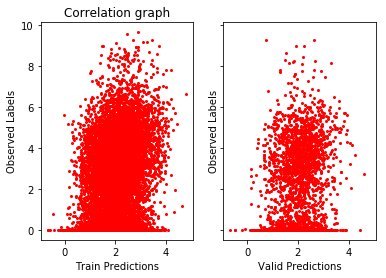

In [27]:
evaluate(linreg, x_train, y_train_regression_labels, x_valid, y_valid_regression_labels, 'TF-SignalValue', 'Unweighted.TF.SignalValue')

Y Train:  18887
Y valid:  3541
Y test:  1181
Y Train El 18887
Y Train El 3541
Y Train El 1181
Y Train labels: 15913
Y valid labels: 2982
Y Test labels: 986
X Train labels: 15913
X valid labels: 2982
X test labels: 986
Y Train C: 15913
Y Valid C: 2982
Y Test C: 986
Y Train R: 15913
Y Valid R: 2982
Y Test R: 986
Train Spearman R: SpearmanrResult(correlation=0.728307588086774, pvalue=0.0)
Train Pearson R: (0.3784870814202498, 0.0)
Valid Spearman R: SpearmanrResult(correlation=0.3838626727676019, pvalue=2.67823672296742e-105)
Valid Pearson R: (0.15734189906343235, 5.506500783676792e-18)
Model Performance
MSError: 7580.9299 


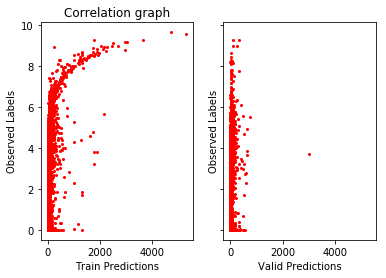

In [33]:
runModels(gene_labels, expression, unweighted_gene_clusters, "TF-SignalValue", 'Unweighted.TF.SignalValue').runrandomforest()

Y Train:  18887
Y valid:  3541
Y test:  1181
Y Train El 18887
Y Train El 3541
Y Train El 1181
Y Train labels: 15913
Y valid labels: 2982
Y Test labels: 986
X Train labels: 15913
X valid labels: 2982
X test labels: 986
Y Train C: 15913
Y Valid C: 2982
Y Test C: 986
Y Train R: 15913
Y Valid R: 2982
Y Test R: 986
Train Spearman R: SpearmanrResult(correlation=0.21879878422291169, pvalue=9.28874680026331e-172)
Train Pearson R: (0.28223607030275555, 3.5592160396283943e-289)
Valid Spearman R: SpearmanrResult(correlation=0.17577357852943867, pvalue=4.0460292908152035e-22)
Valid Pearson R: (0.2112169230038464, 2.0159448511083624e-31)
Model Performance
MSError: 10208.5368 


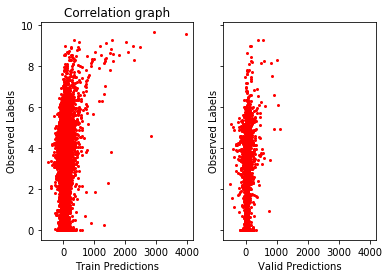

In [30]:
weighted_gene_clusters = pickle.load(open("/mnt/lab_data2/kmualim/enh-gene-linking/datasets/embeddings/new_version/TF-Chipseq/EnhancersPromoters.TFSignalValue.GeneClusters.ABC.Score.weighted.p", "rb"))
runModels(gene_labels, expression, weighted_gene_clusters, "TF-SignalValue", 'Weighted.TF.SignalValue').runlinreg()

Y Train:  18887
Y valid:  3541
Y test:  1181
Y Train El 18887
Y Train El 3541
Y Train El 1181
Y Train labels: 15913
Y valid labels: 2982
Y Test labels: 986
X Train labels: 15913
X valid labels: 2982
X test labels: 986
Y Train C: 15913
Y Valid C: 2982
Y Test C: 986
Y Train R: 15913
Y Valid R: 2982
Y Test R: 986
Train Spearman R: SpearmanrResult(correlation=0.8336527919552961, pvalue=0.0)
Train Pearson R: (0.4257060510189551, 0.0)
Valid Spearman R: SpearmanrResult(correlation=0.6606875080931762, pvalue=0.0)
Valid Pearson R: (0.3522111383797855, 8.112749622100069e-88)
Model Performance
MSError: 11555.0877 


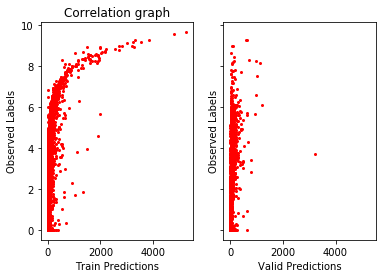

In [34]:
runModels(gene_labels, expression, weighted_gene_clusters, "TF-SignalValue", 'Weighted.TF.SignalValue').runrandomforest()

## generating input for FIMO scores on motifs 

In [ ]:
# different scoring function of applying distance from peak to the motif 
# grab lookup table for TF Chip-seq 


In [ ]:
# enhancers by genes 
# grab enhancer scores and regions 
enhancers_scores_pyranges = pd.read_csv("EnhancerScores.Pyranges.csv", sep="\t")
genes = enhancers_scores_pyranges.df.Gene.drop_duplicates()
enhancers_tf = pd.read_csv("EnhancerGeneLinkingABCScoreMatrixFor.Fimo.bed", sep="\t")
for i in genes: 
    gene_centric_entry = enhancers_tf.loc[:, i]
    matches = enhancers_scores_pyranges.df.loc[enhancers_scores_pyranges['Gene']==i]
    clusters = matches.loc[:, 'Cluster']
    scores = matches.loc[:, 'Score']
    gene_centric_scores = [0]*len(117128)
    k=0
    for j in clusters:
        gene_centric_scores[j-1] = scores[k]
        k+=1
    enhancers_tf.loc[:,i]*=gene_centric_scores

In [ ]:
fimo_gene_dictionary = pickle.load(open("/mnt/lab_data2/kmualim/enh-gene-linking/datasets/embeddings/new_version/TF-Chipseq/FIMO.Genecentric.EnhancerPredictions.ABCScore.p", "rb"))
#nonzero_fimo_gene_dictionary = remove_all_nonzero(fimo_gene_dictionary)


Y Train:  10860
Y valid:  2036
Y test:  679
Y Train El 10860
Y Train El 2036
Y Train El 679
Y Train labels: 9044
Y valid labels: 1679
Y Test labels: 562
X Train labels: 9044
X valid labels: 1679
X test labels: 562
Y Train C: 9044
Y Valid C: 1679
Y Test C: 562
Y Train R: 9044
Y Valid R: 1679
Y Test R: 562
Train Spearman R: SpearmanrResult(correlation=0.9320147786163164, pvalue=0.0)
Train Pearson R: (0.33062866790026685, 1.2770211880480079e-229)
Valid Spearman R: SpearmanrResult(correlation=-0.01649655994259282, pvalue=0.49935876751328867)
Valid Pearson R: (-0.005754943682098379, 0.8137131061213723)
Model Performance
MSError: 57519825135315995687124992.0000 


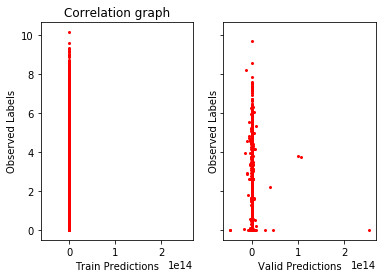

In [42]:
runModels(gene_labels, expression, fimo_gene_dictionary, "FIMO.MotifScores", 'Nonzero.FIMO.MotifScores').runlinreg()

In [ ]:
runModels(gene_labels, expression, fimo_gene_dictionary, "FIMO.MotifScores", 'FIMO.MotifScores').runlinreg()

In [40]:
runModels(gene_labels, expression, fimo_gene_dictionary, "FIMO.MotifScores", 'FIMO.MotifScores').runrandomforest()

Y Train:  10860
Y valid:  2036
Y test:  679
Y Train El 10860
Y Train El 2036
Y Train El 679
Y Train labels: 9044
Y valid labels: 1679
Y Test labels: 562
X Train labels: 9044
X valid labels: 1679
X test labels: 562
Y Train C: 9044
Y Valid C: 1679
Y Test C: 562
Y Train R: 9044
Y Valid R: 1679
Y Test R: 562


KeyboardInterrupt: 

# Look into this: How is it that MatchPWMs with only 32 features could perform so much better than using FIMO scores for > number of regions

In [ ]:
### look at fimo occurrence rather than fimo scores 